### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [4]:
df = pd.read_csv('USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:

'Avg. Area Income' ('Сред. Доход от района'): Сред. доходы жителей города, дом находится в городе.

'Avg. Area House Age' ('Сред. Площадь дома'): средний возраст домов в том же городе.

'Avg. Area Number of Rooms' ('Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.

'Avg. Area Number of Bedrooms' ('Сред. Площадь Количество спален'): Среднее количество спален в домах в том же городе.

'Area Population' ('Население региона'): население городского дома, в котором находится.

'Price'('Цена'): цена, по которой был продан дом.

'Address'('Адрес'): адрес дома.
    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Figure size 800x600 with 0 Axes>

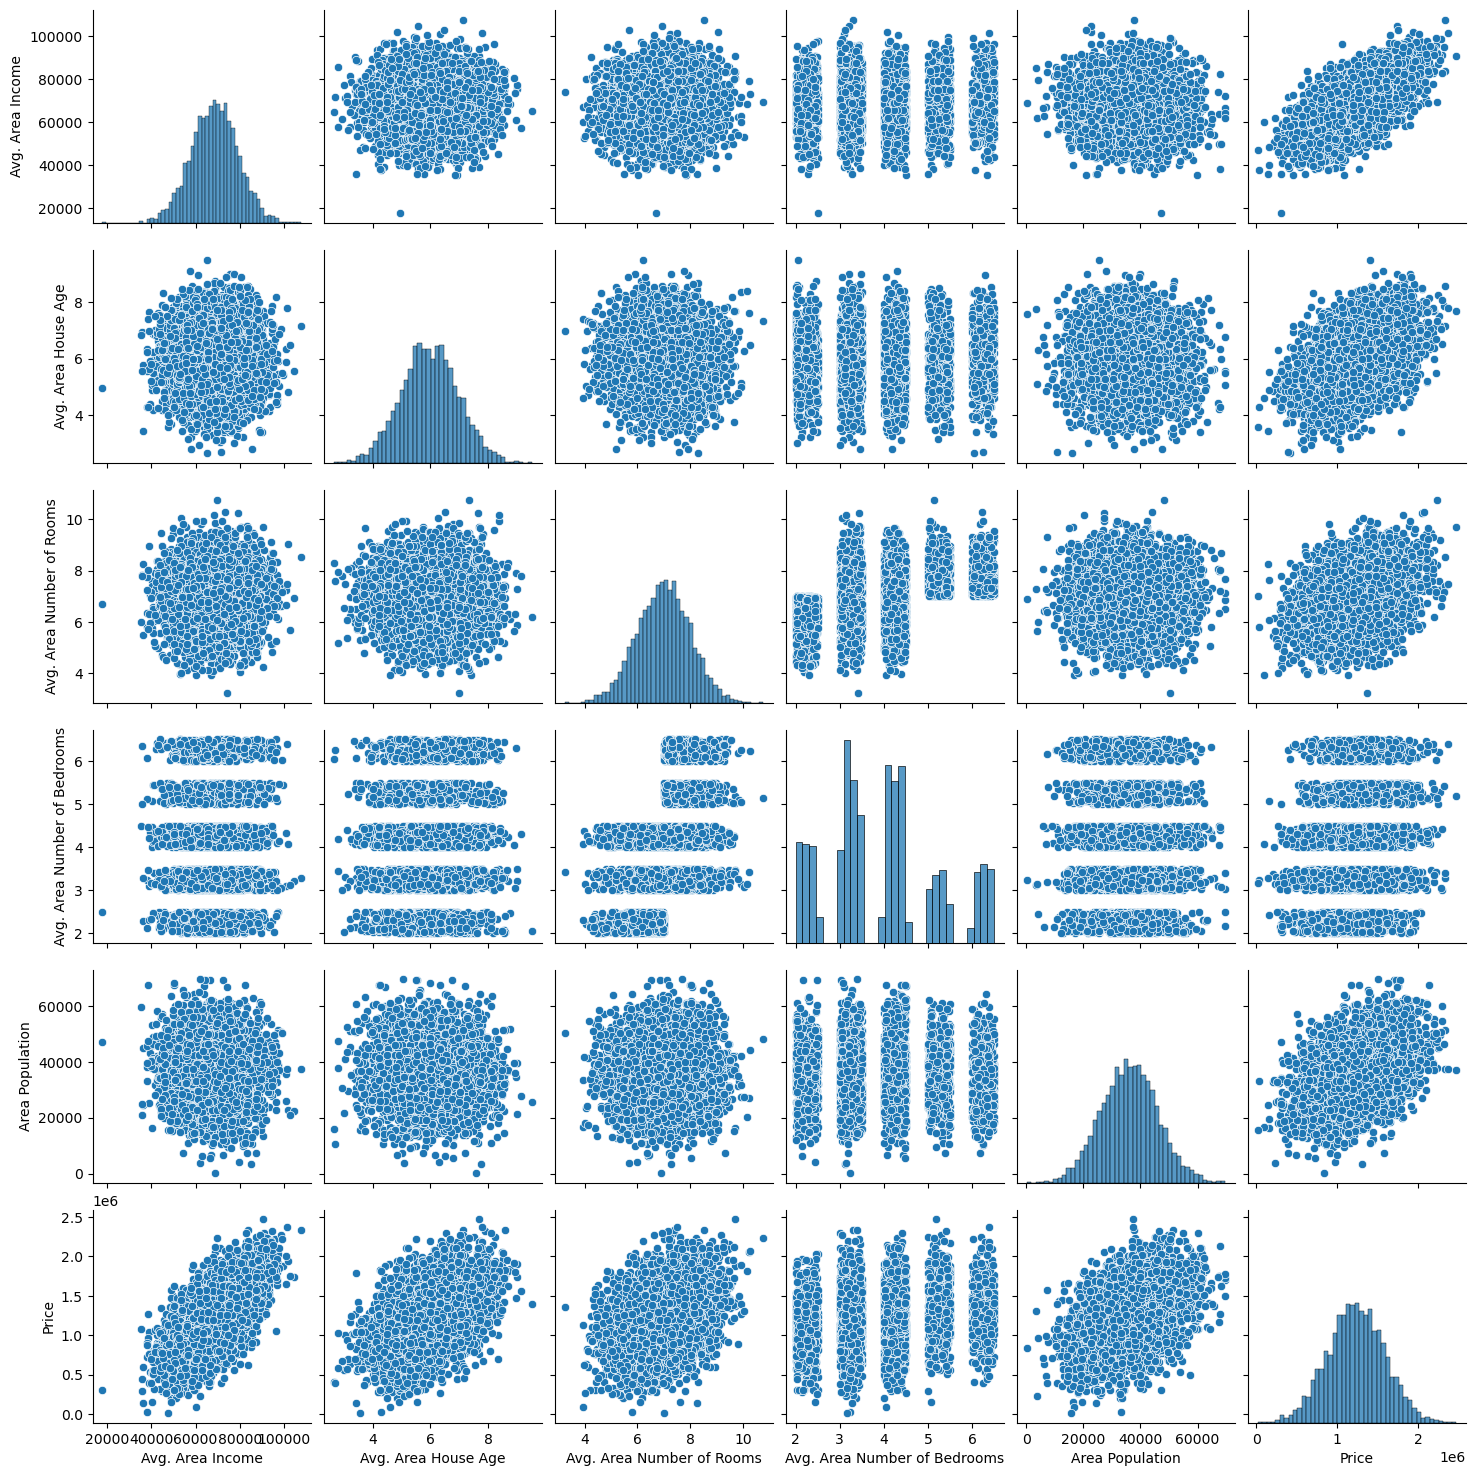

In [8]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

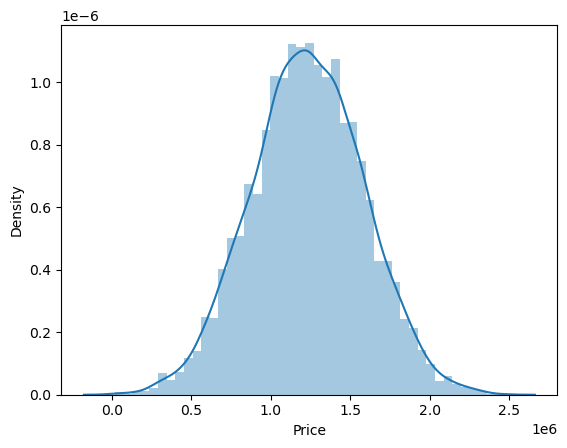

In [9]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

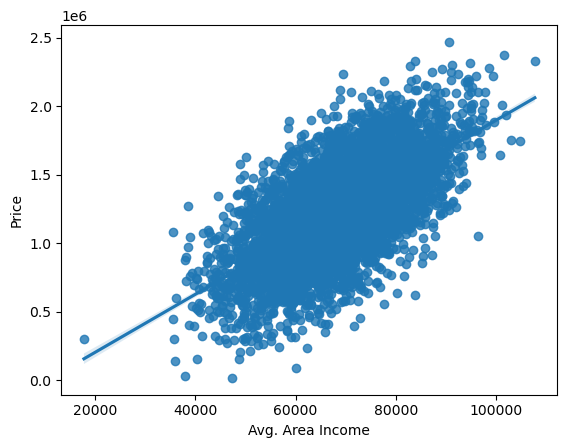

In [10]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [11]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

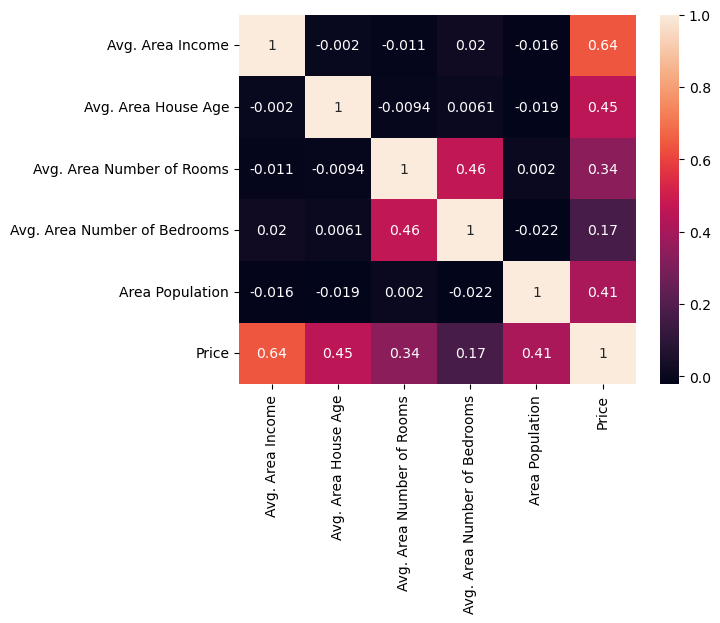

In [12]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [13]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

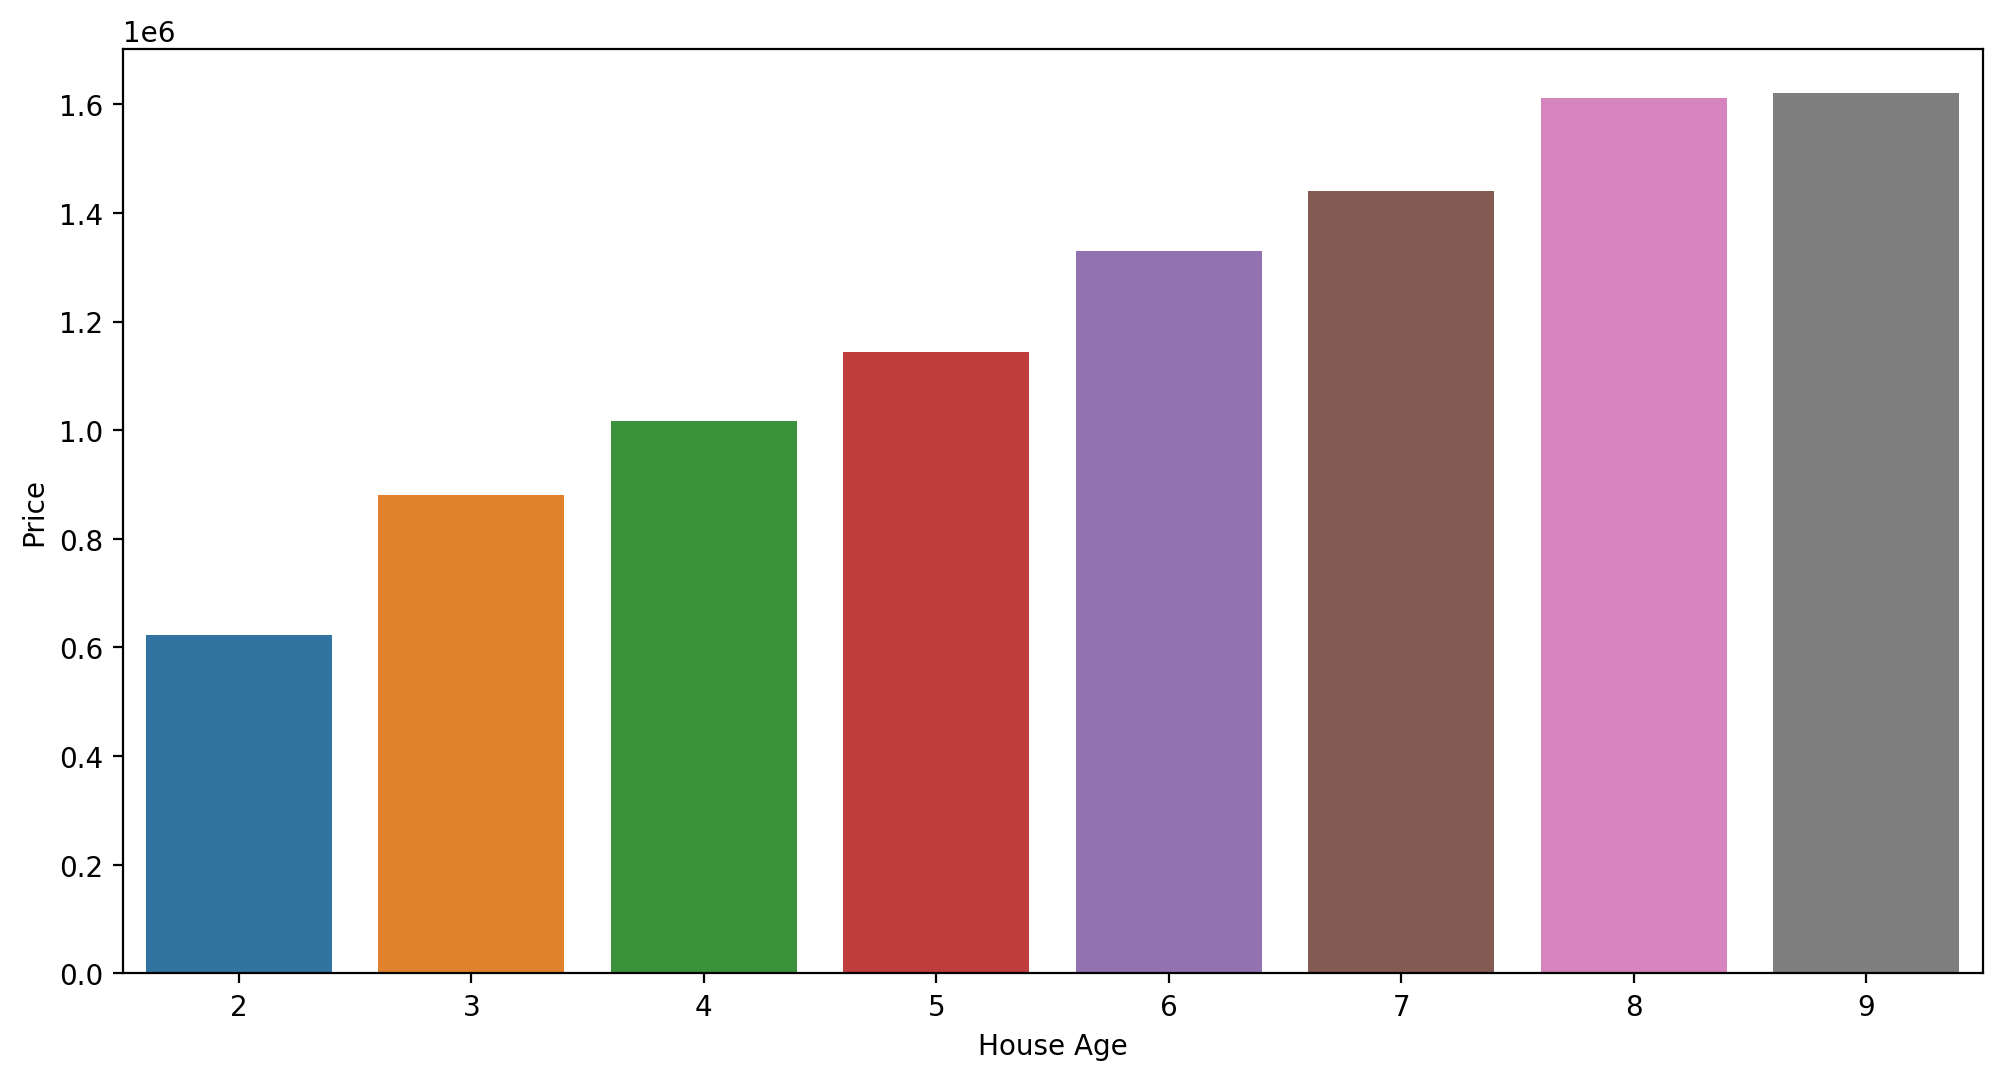

In [14]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [15]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

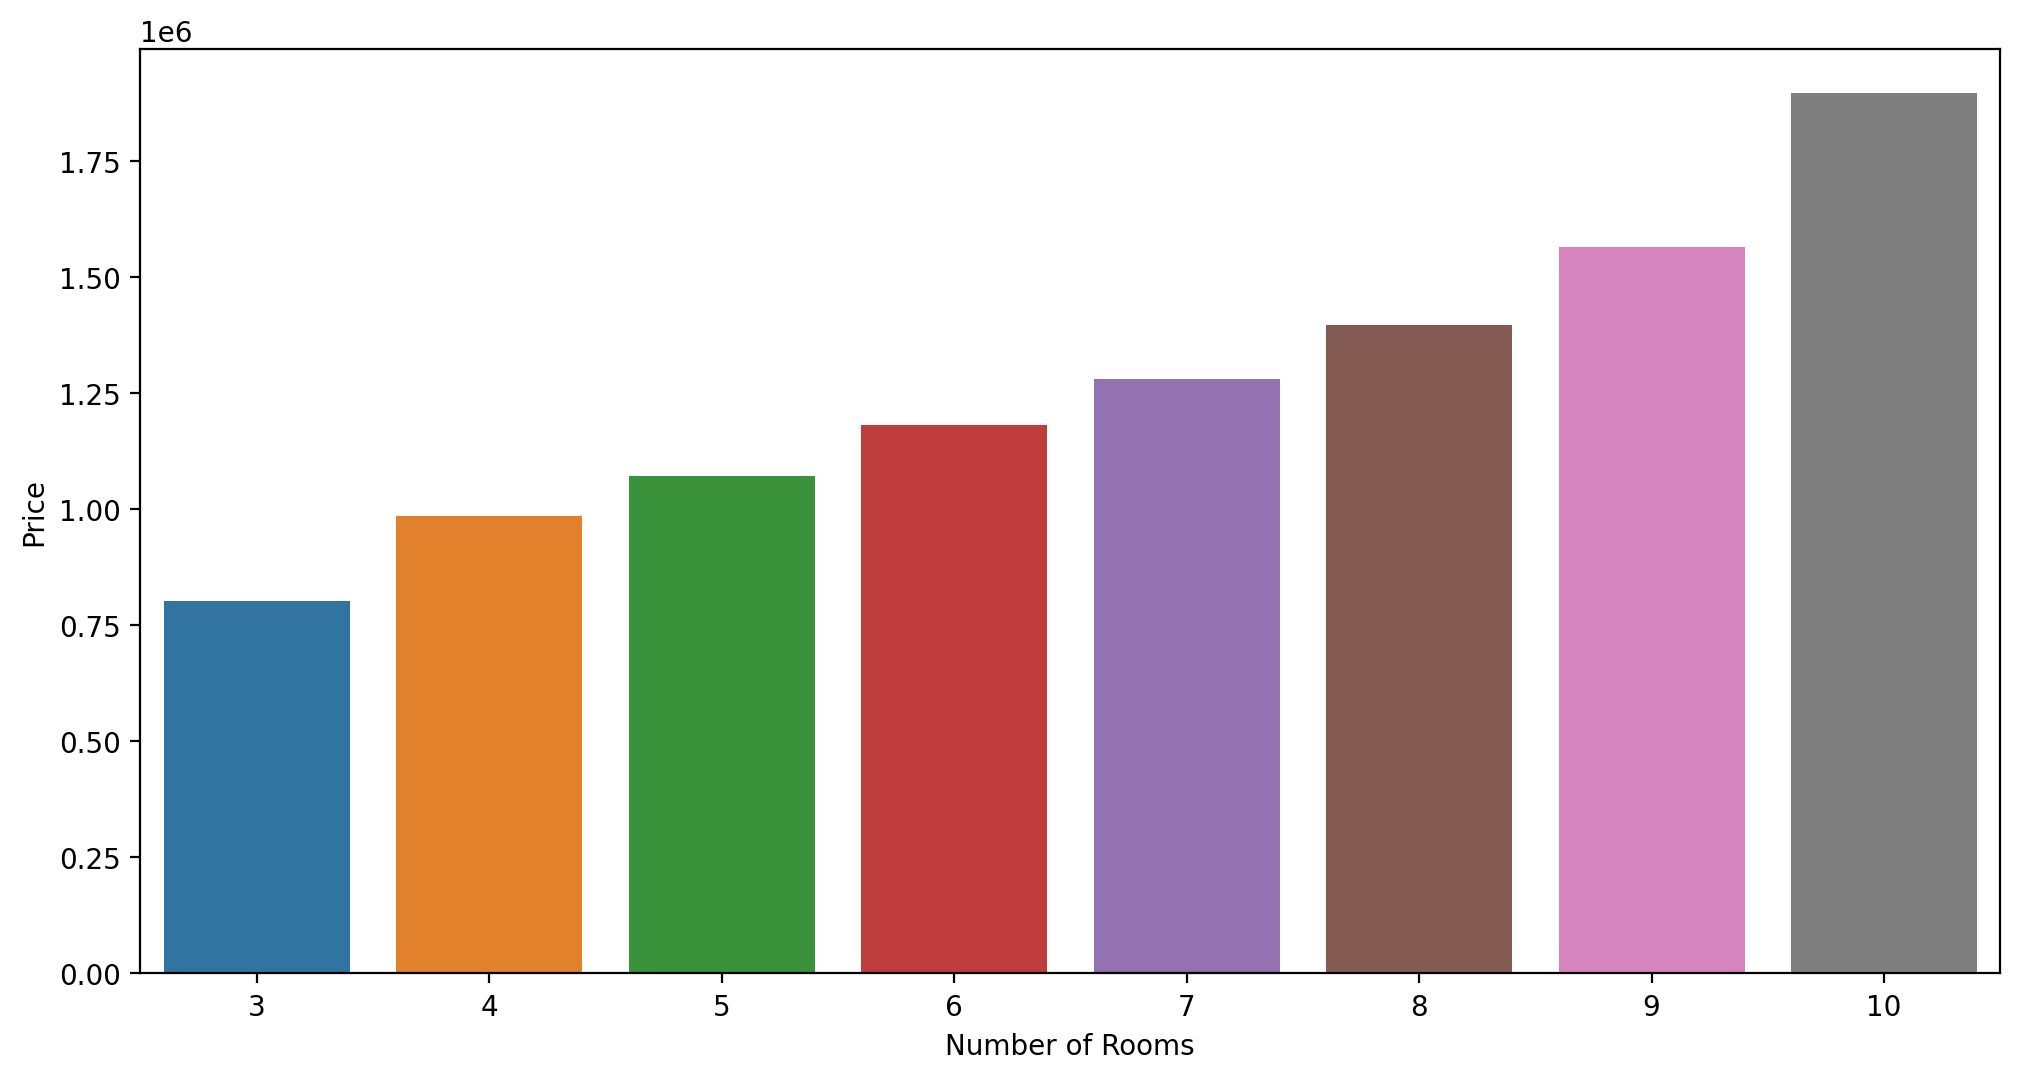

In [16]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [17]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

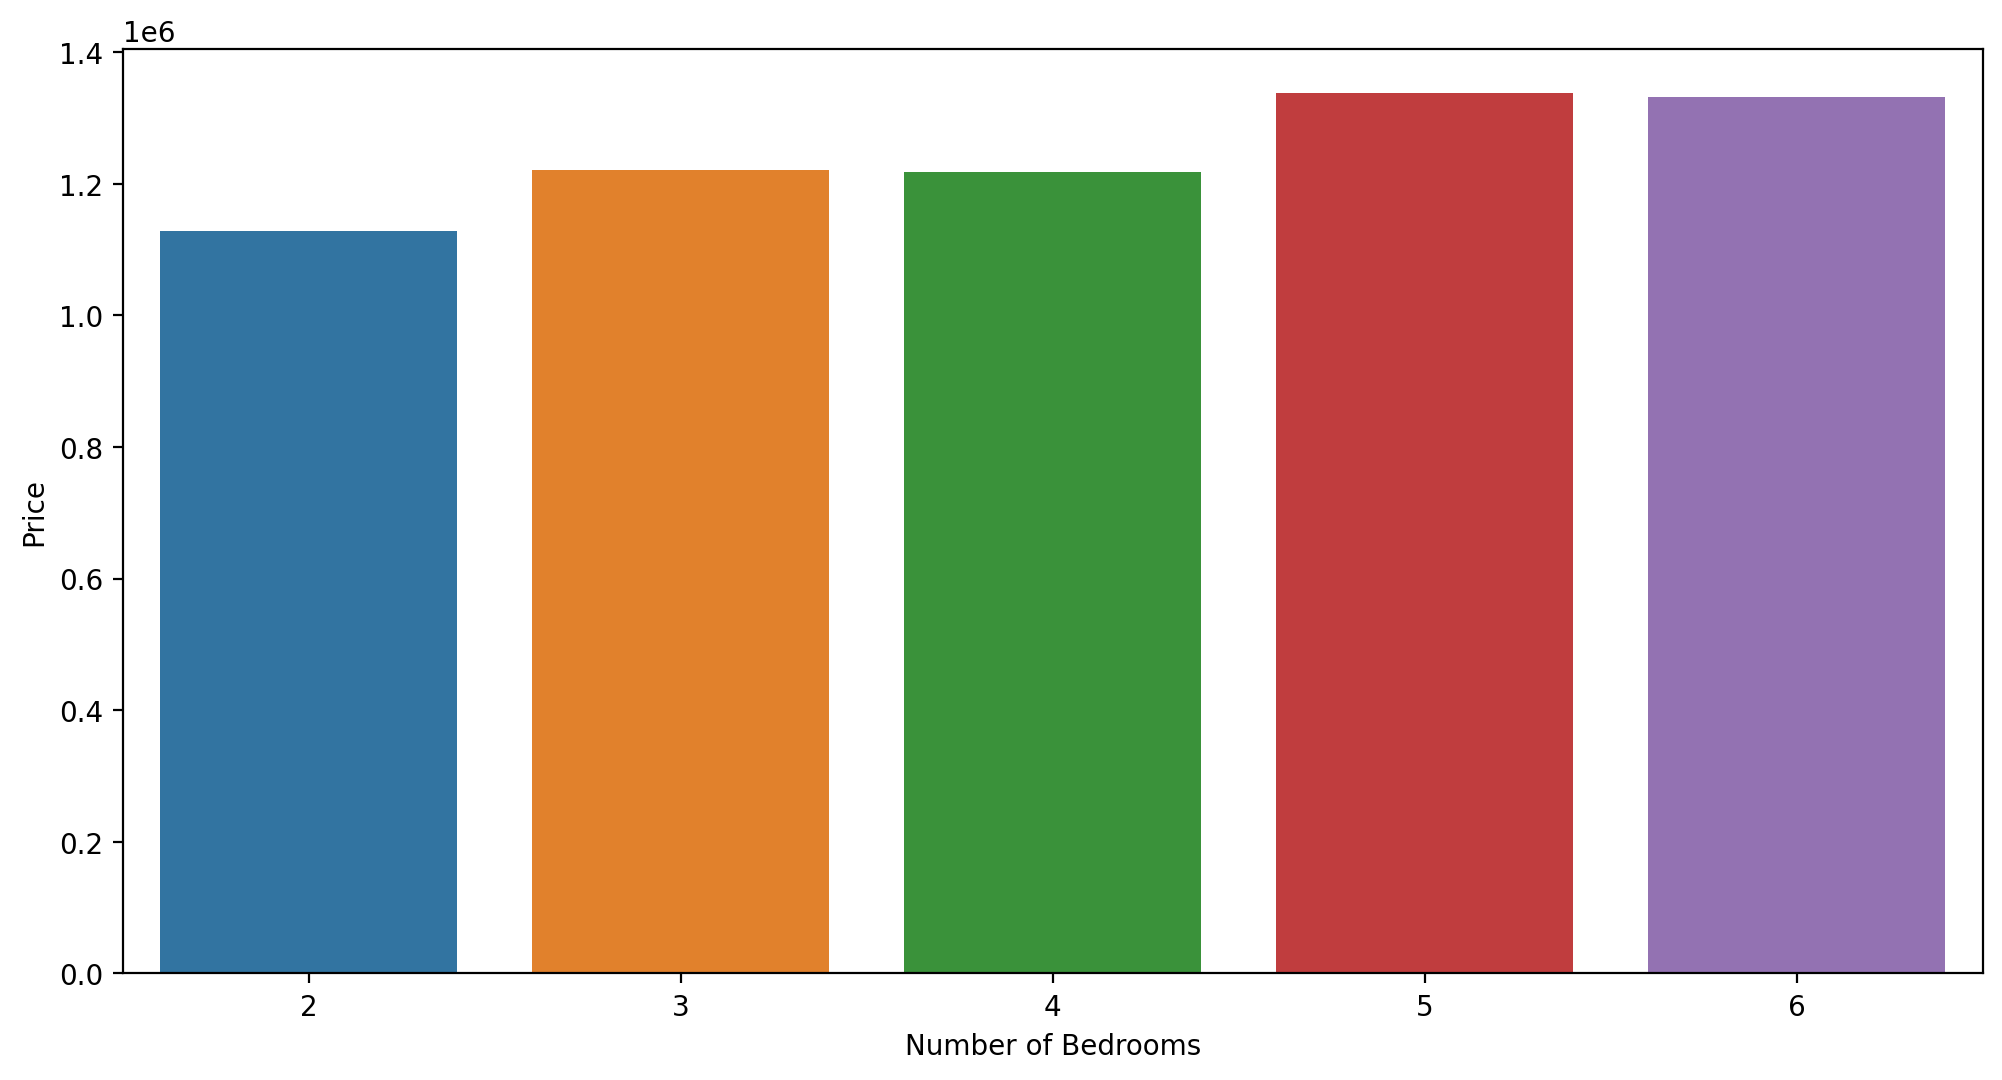

In [18]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [19]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [20]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [21]:
y = df['Price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
#обучение модели на тренировочных данных
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [28]:
# предсказанное значение целевой переменной, 
# при значении всех предикторов равных нулю
lrm.intercept_

-2638673.426191325

In [58]:
#влияние каждой независимой переменной на зависимую переменную

lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [60]:
predictions = lrm.predict(X_test)

In [62]:
predictions

array([1308536.13592627, 1237122.72746484, 1243835.62817059, ...,
       1457119.79297249, 1483428.95309395, 1047510.59737165])

In [64]:
y_test.round(3)

1501    1339096.077
2586    1251794.179
2653    1340094.966
1055    1431507.623
705     1042373.524
           ...     
3563    1348221.765
1538    1309937.399
1837    1472887.247
2380    1409762.119
1912    1009606.284
Name: Price, Length: 1500, dtype: float64

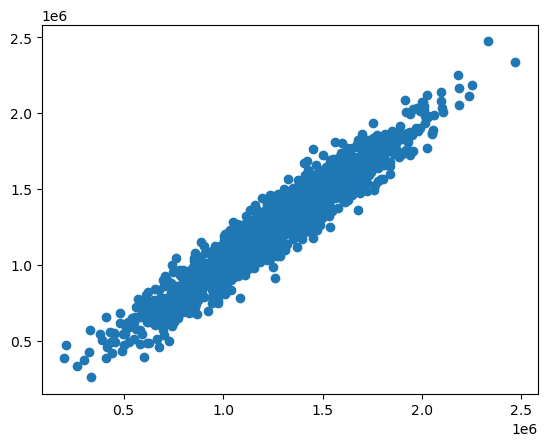

In [66]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

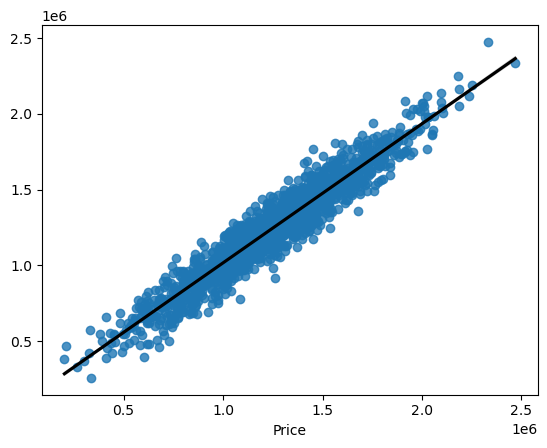

In [68]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

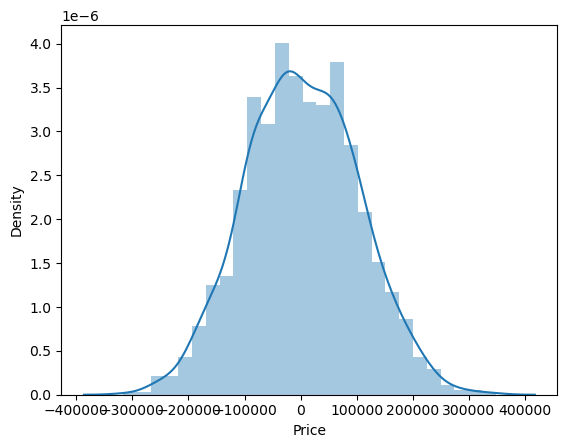

In [70]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Коэффициент детерминации $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [73]:
from sklearn import metrics

In [75]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336873

In [77]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401155

In [79]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100341.52954485573

In [81]:
metrics.r2_score(y_test, predictions)

0.9146818498753992

### Модель KNeighborsRegressor для задачи регрессии из sklearn.

In [85]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [87]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [89]:
from sklearn.metrics import r2_score

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.67
Test R2 0.47


### Модель DecisionTreeRegressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [94]:
pred_train = tree_1.predict(X_train)
pred_test = tree_1.predict(X_test)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.93
Test R2 0.76


In [96]:
X.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039
std,10657.991214,0.991456,1.005833,1.234137,9925.650114
min,17796.631190,2.644304,3.236194,2.000000,172.610686
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769
max,107701.748378,9.519088,10.759588,6.500000,69621.713378


### Масштабирование данных

Есть два основных вида масштабирования данных: нормализация и стандартизация.

### Нормализация

Для того, чтобы сделать нормализацию данных нужно посчитать в каждом признаке его минимум (min) и максимум (max), а затем сделать следующее вычисление:

$$x = \frac{x - min}{max - min}$$

После такого преобразования $min = 0, max = 1$.

In [101]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [103]:
mms.transform(X_train)

array([[0.43091002, 0.18763801, 0.81275567, 0.52888889, 0.6070962 ],
       [0.51215059, 0.55700721, 0.62624585, 0.26444444, 0.65998844],
       [0.68520905, 0.39854502, 0.71083283, 0.24666667, 0.35307175],
       ...,
       [0.55690809, 0.55952358, 0.47923756, 0.25333333, 0.51259253],
       [0.47059858, 0.68924723, 0.85653117, 0.51555556, 0.70362008],
       [0.4989978 , 0.47004852, 0.65934704, 0.89777778, 0.49367042]])

In [105]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.430910,0.187638,0.812756,0.528889,0.607096
1,0.512151,0.557007,0.626246,0.264444,0.659988
2,0.685209,0.398545,0.710833,0.246667,0.353072
3,0.552890,0.541590,0.506534,0.262222,0.375796
4,0.593217,0.618394,0.717203,0.508889,0.504906
...,...,...,...,...,...
3495,0.672300,0.539579,0.298988,0.093333,0.405207
3496,0.447476,0.625362,0.605625,0.306667,0.603542
3497,0.556908,0.559524,0.479238,0.253333,0.512593
3498,0.470599,0.689247,0.856531,0.515556,0.703620


In [107]:
X_train_norm.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,0.584453,0.481119,0.532291,0.440753,0.493584
std,0.123822,0.144759,0.143509,0.272306,0.149864
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500858,0.385082,0.434377,0.255556,0.392854
50%,0.588549,0.479492,0.535147,0.455556,0.497025
75%,0.668783,0.580418,0.629244,0.555556,0.595034
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.584221,0.483668,0.533347,0.439228,0.500395
std,0.119870,0.145706,0.141165,0.278832,0.149012
min,0.204961,-0.005667,0.112401,0.000000,-0.046925
25%,0.507252,0.387591,0.436044,0.253333,0.397766
50%,0.582550,0.484166,0.533307,0.453333,0.493708
75%,0.662788,0.580418,0.628245,0.548889,0.602946
max,1.034509,0.920181,1.068083,1.000000,0.999553


#### Обучение модели на масштабированных данных

In [112]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [114]:
pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.90
Test R2 0.85


In [116]:
tree_1.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [118]:
pred_train = tree_1.predict(X_train_norm)
pred_test = tree_1.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.93
Test R2 0.76


In [120]:
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [122]:
pred_train = lrm.predict(X_train_norm)
pred_test = lrm.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.92
Test R2 0.91


### Стандартизация

Для того, чтобы сделать стандартизацию данных нужно посчитать в каждом признаке его среднее значение (`mean`) и стандартное отклонение (`std`), а затем сделать следующее вычисление:

$$x = \frac{x - mean}{std}$$

После такого преобразования $mean = 0, std = 1$.

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [127]:
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,-1.240206,-2.027672,1.954620,0.323711,0.757544
1,-0.584005,0.524313,0.654792,-0.647558,1.110530
2,0.813833,-0.570508,1.244297,-0.712854,-0.937737
3,-0.254939,0.417792,-0.179508,-0.655720,-0.786081
4,0.070788,0.948439,1.288692,0.250254,0.075561
...,...,...,...,...,...
3495,0.709560,0.403899,-1.625938,-1.276027,-0.589805
3496,-1.106399,0.996577,0.511083,-0.492481,0.733824
3497,-0.222487,0.541699,-0.369742,-0.688368,0.126855
3498,-0.919631,1.437964,2.259701,0.274740,1.401714


In [129]:
X_train_std.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03
mean,-3.552714e-17,-2.456448e-16,1.329730e-16,1.258676e-16,-2.380318e-16
std,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00
min,-4.720776e+00,-3.324069e+00,-3.709655e+00,-1.618828e+00,-3.294028e+00
25%,-6.752214e-01,-6.635235e-01,-6.823873e-01,-6.802059e-01,-6.722446e-01
50%,3.308071e-02,-1.124254e-02,1.990314e-02,5.436778e-02,2.295981e-02
75%,6.811552e-01,6.860607e-01,6.756889e-01,4.216546e-01,6.770410e-01
max,3.356480e+00,3.584965e+00,3.259567e+00,2.054040e+00,3.379662e+00


In [131]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [133]:
X_train_std.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,3500.0000,3500.0000,3500.0000,3500.0000,3500.0000
mean,-0.0000,-0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001
min,-4.7208,-3.3241,-3.7097,-1.6188,-3.2940
25%,-0.6752,-0.6635,-0.6824,-0.6802,-0.6722
50%,0.0331,-0.0112,0.0199,0.0544,0.0230
75%,0.6812,0.6861,0.6757,0.4217,0.6770
max,3.3565,3.5850,3.2596,2.0540,3.3797


In [135]:
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_test_std.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,1500.0000,1500.0000,1500.0000,1500.0000,1500.0000
mean,-0.0019,0.0176,0.0074,-0.0056,0.0455
std,0.9682,1.0067,0.9838,1.0241,0.9945
min,-3.0653,-3.3632,-2.9263,-1.6188,-3.6072
25%,-0.6236,-0.6462,-0.6708,-0.6884,-0.6395
50%,-0.0154,0.0210,0.0071,0.0462,0.0008
75%,0.6327,0.6861,0.6687,0.3972,0.7298
max,3.6352,3.0335,3.7341,2.0540,3.3767


#### Обучение модели на масштабированных данных

In [138]:
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

In [140]:
pred_train = knn.predict(X_train_std)
pred_test = knn.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.91
Test R2 0.86


In [142]:
tree_1.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [144]:
pred_train = tree_1.predict(X_train_std)
pred_test = tree_1.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.93
Test R2 0.76


In [146]:
lrm.fit(X_train_std, y_train)

LinearRegression()

In [148]:
pred_train = lrm.predict(X_train_std)
pred_test = lrm.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.92
Test R2 0.91


In [150]:
tree_2 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_2.fit(X_train_std, y_train)
pred_train = tree_2.predict(X_train_std)
pred_test = tree_2.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.93
Test R2 0.76


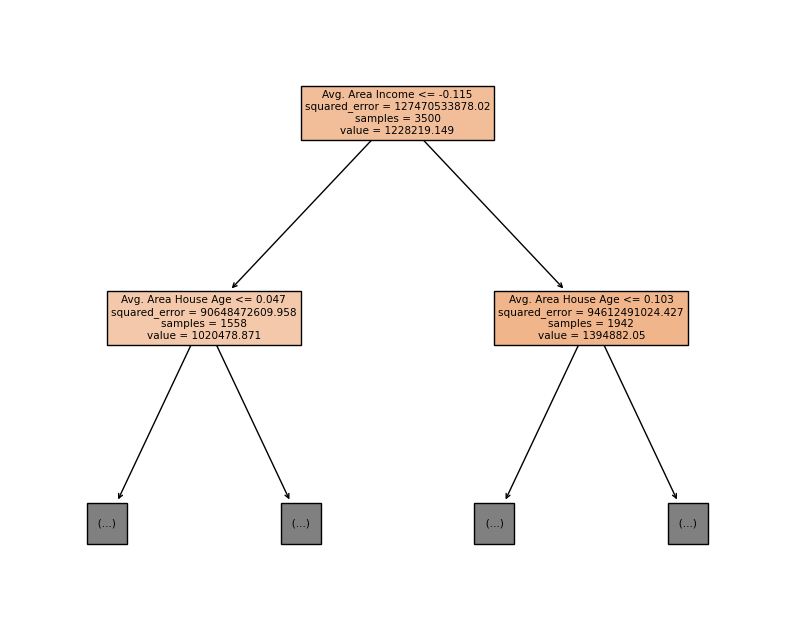

In [152]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(tree_1, max_depth=1, filled=True, feature_names=X_train.columns);

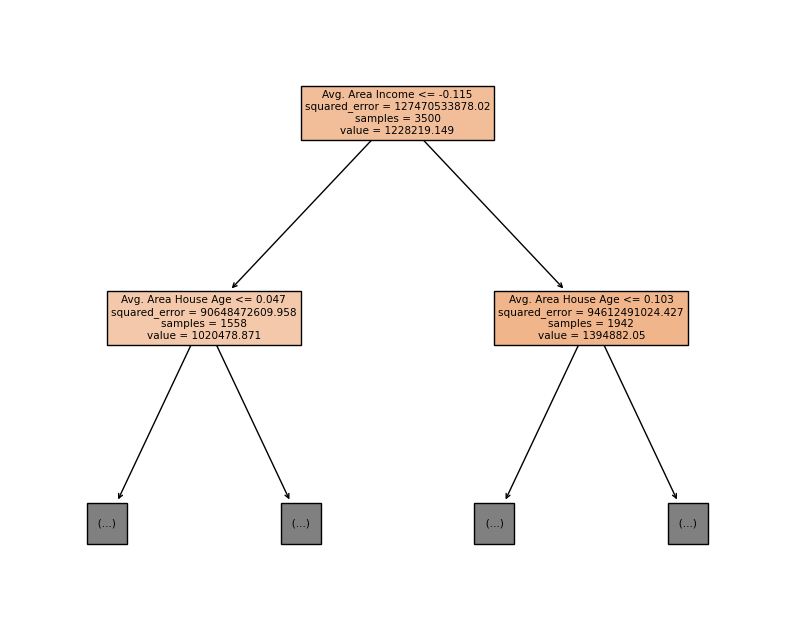

In [154]:
plt.figure(figsize=(10, 8))
plot_tree(tree_2, max_depth=1, filled=True, feature_names=X_train.columns);

Итоги
- Масштабирование данных нужно для более **стабильного** обучения модели.
- Есть два основных вида масштабирование
    1. ***Нормализация***
        - После min = 0, max = 1 у всех признаков
        - Подход лучше зарекомендовал себя в подходах МЛ, которые работают с расстояниями (KNN) 
    2. ***Стандартизация***
        - После mean = 0, std = 1 у всех признаков
        - Подход лучше зарекомендовал себя в линейных подходах МЛ (LinearRegression, SVM) 
- Для моделей, основанных на **дереве решений** (DecisionTree, Bagging, RandomForest, Boosting) масштабирование данных **необязательно**

### Настройка гиперпараметров модели

In [174]:
from sklearn.ensemble import RandomForestRegressor

tree_3 = RandomForestRegressor()
tree_3.fit(X_train_std, y_train)
pred_train = tree_3.predict(X_train_std)
pred_test = tree_3.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.98
Test R2 0.88


In [160]:
from sklearn.model_selection import GridSearchCV

In [162]:
# словарь с гиперпараметрами
params = {"max_depth": range(1,10,1), "min_samples_leaf": range(1,6,1)} 

In [164]:
grid = GridSearchCV(tree_3, params, cv = 5, n_jobs = -1)

In [166]:
%%timeit

# обучение 
grid.fit(X_train_std, y_train) 

32.6 s ± 1.59 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [168]:
# параметры лучшей модели
grid.best_params_ 

{'max_depth': 9, 'min_samples_leaf': 2}

In [170]:
# лучший алгоритм
best_clf = grid.best_estimator_ 

In [178]:
pred_train = best_clf.predict(X_train_std)
pred_test = best_clf.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.95
Test R2 0.87


In [72]:
tree_2 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_2.fit(X_train_std, y_train)
pred_train = tree_2.predict(X_train_std)
pred_test = tree_2.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.93
Test R2 0.76


In [73]:
# словарь с гиперпараметрами
params = {"max_depth": range(1,10,1), "min_samples_leaf": range(1,6,1)} 

In [74]:
grid2 = GridSearchCV(tree_2, params, cv = 5, n_jobs = -1)

In [75]:
%%timeit

# обучение 
grid2.fit(X_train_std, y_train) 

473 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
# параметры лучшей модели
grid2.best_params_ 

{'max_depth': 9, 'min_samples_leaf': 3}

In [77]:
# лучший алгоритм
best_clf2 = grid2.best_estimator_ 

In [78]:
pred_train = best_clf2.predict(X_train_std)
pred_test = best_clf2.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.92
Test R2 0.77


In [79]:
lrm.fit(X_train_std, y_train)
pred_train = lrm.predict(X_train_std)
pred_test = lrm.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.92
Test R2 0.91


In [105]:
# словарь с гиперпараметрами
linear_params = {'fit_intercept': (True, False)}

In [106]:
grid3 = GridSearchCV(lrm, linear_params, cv = 5, n_jobs = -1)

In [107]:
%%timeit

# обучение 
grid3.fit(X_train_std, y_train) 

44.9 ms ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
# параметры лучшей модели
grid3.best_params_ 

{'fit_intercept': True}

In [109]:
# лучший алгоритм
best_clf3 = grid3.best_estimator_ 

In [111]:
pred_train = best_clf3.predict(X_train_std)
pred_test = best_clf3.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.92
Test R2 0.91
